In [6]:
import json

In [7]:
with open('result/ground_truth.json') as f:
    ground_truth = json.load(f)

with open('result/convnext_outputs.json') as f:
    convnext_outputs = json.load(f)

with open('result/cropnet_outputs.json') as f:
    cropnet_outputs = json.load(f)

with open('result/vit_outputs.json') as f:
    vit_outputs = json.load(f)


In [10]:
import numpy as np
def get_all_wrong(ground_truth, output1, output2, output3):
    all_wrong = []
    for key in ground_truth:
        predict_1 = np.argmax(output1[key])
        predict_2 = np.argmax(output2[key])
        predict_3 = np.argmax(output3[key])
        if predict_1 != ground_truth[key] and predict_2 != ground_truth[key] and predict_3 != ground_truth[key]:
            all_wrong.append(key)
    return all_wrong
all_wrong = get_all_wrong(ground_truth, convnext_outputs, cropnet_outputs, vit_outputs)
print(all_wrong)
print(len(all_wrong))

['3243085170.jpg', '2194364157.jpg', '710791285.jpg', '3496438505.jpg', '376862597.jpg', '1205478806.jpg', '1891755915.jpg', '2089741702.jpg', '62053025.jpg', '1046156726.jpg', '2948468563.jpg', '3274661195.jpg', '3644947505.jpg', '1644503085.jpg', '1761872222.jpg', '1482718698.jpg', '1329201937.jpg', '3813128079.jpg', '3237815335.jpg', '3305945509.jpg', '2028369861.jpg', '601263353.jpg', '4262410116.jpg', '958551982.jpg', '2856542971.jpg', '2953205129.jpg', '3634041994.jpg', '828472143.jpg', '1453190275.jpg', '1530010093.jpg', '1683677421.jpg', '3986821371.jpg', '2839492411.jpg', '2933094268.jpg', '881681381.jpg', '812733394.jpg', '2771434768.jpg', '4286158151.jpg', '1832233045.jpg', '3308428199.jpg', '447826793.jpg', '2754537497.jpg', '845926406.jpg', '3344412896.jpg', '2623834949.jpg', '1534401639.jpg', '1123269893.jpg', '422752547.jpg', '3809682538.jpg']
49


In [19]:
merged_outputs = {}
for key in ground_truth:
    merged_outputs[key] = [0,0,0,0,0]
    for i in range(len(convnext_outputs[key])):
        merged_outputs[key][i] = (convnext_outputs[key][i] + cropnet_outputs[key][i] + vit_outputs[key][i]) / 3

In [21]:
def classify(ground_truth, output, all_wrong):
    prob_diff = []
    for key in ground_truth:
        if key in all_wrong:
            continue
        predict = np.argmax(output[key])
        if ground_truth[key] != predict:
            # key is wrong, but some are correct
            predict_prob = output[key][predict]
            ground_truth_prob = output[key][ground_truth[key]]
            prob_dif = predict_prob - ground_truth_prob
            prob_diff.append(prob_dif)
    return prob_diff
prob_diff_convnext = classify(ground_truth, convnext_outputs, all_wrong)
prob_diff_cropnet = classify(ground_truth, cropnet_outputs, all_wrong)
prob_diff_vit = classify(ground_truth, vit_outputs, all_wrong)
prob_diff_merged = classify(ground_truth, merged_outputs, all_wrong)

[0.00786033 0.01717615 0.02260676 0.05271891 0.11558118 0.11686006
 0.12734625 0.14687839 0.16394451 0.16752172 0.19279408 0.2075215
 0.21366772 0.21926403 0.22409573 0.26915964 0.27565718 0.2780486
 0.28128022 0.30468336 0.35007599 0.36600488 0.37538058 0.38446975
 0.39877698 0.42127961 0.46724465 0.48799591 0.52457684 0.53437102
 0.536631   0.54452085 0.55372083 0.55396712 0.5643198  0.57116112
 0.58861613 0.5923507  0.60898627 0.61461985 0.69446917 0.70563145
 0.72502954 0.7867362  0.82548968 0.86407638 0.86494922 0.96139162]
[0.01643121 0.02296868 0.03334355 0.04329461 0.05151114 0.05854294
 0.06160295 0.07186103 0.08968657 0.12101123 0.14699483 0.15038213
 0.15640885 0.16413647 0.17250761 0.1788052  0.1844964  0.18458778
 0.18545884 0.20989186 0.21002808 0.2156491  0.21806255 0.23495945
 0.24943525 0.2527402  0.26021779 0.28752825 0.29062614 0.29784617
 0.33389327 0.3354947  0.34161484 0.35023768 0.35875472 0.36394763
 0.37398879 0.37874654 0.40407897 0.4057169  0.40993896 0.42593

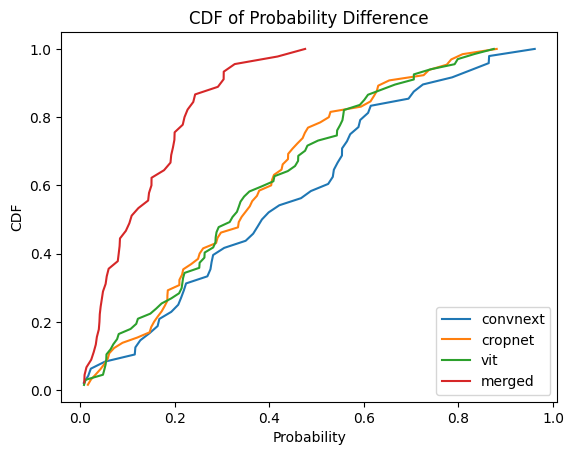

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cdf(data, label):
    sorted_data = np.sort(data)
    print(sorted_data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf, label=label)

plot_cdf(prob_diff_convnext, 'convnext')
plot_cdf(prob_diff_cropnet, 'cropnet')
plot_cdf(prob_diff_vit, 'vit')
plot_cdf(prob_diff_merged, 'merged')
plt.title('CDF of Probability Difference')
plt.xlabel('Probability')
plt.ylabel('CDF')
plt.legend()


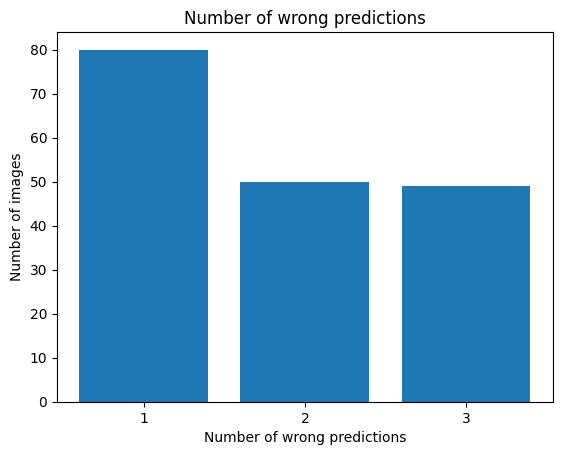

In [15]:
def get_num_wrong(ground_truth, output1, output2, output3):
    num_wrong_array = [0,0,0]
    for key in ground_truth:
        predict_1 = np.argmax(output1[key])
        predict_2 = np.argmax(output2[key])
        predict_3 = np.argmax(output3[key])
        wrong_num = 0
        if predict_1 != ground_truth[key]:
            wrong_num += 1
        if predict_2 != ground_truth[key]:
            wrong_num += 1
        if predict_3 != ground_truth[key]:
            wrong_num += 1
        if wrong_num == 0:
            continue
        num_wrong_array[wrong_num-1] += 1
    return num_wrong_array
num_wrong_array = get_num_wrong(ground_truth, convnext_outputs, cropnet_outputs, vit_outputs)
# print bar chart
plt.figure()
plt.bar(['1', '2', '3'], num_wrong_array)
plt.title('Number of wrong predictions')
plt.xlabel('Number of wrong predictions')
plt.ylabel('Number of images')
plt.show()
        